<a href="https://colab.research.google.com/github/aysh01/Practical__/blob/main/Social_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
df=pd.read_csv(r'https://raw.githubusercontent.com/aysh01/Practical__/main/Social_Network_Ads.csv')

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [172]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


<hr>

In [173]:
df.drop('User ID',axis=1,inplace=True)

In [174]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [175]:
gender=pd.get_dummies(df['Gender'], dtype='int',drop_first=False)

In [176]:
gender

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [177]:
df.drop('Gender',axis=1,inplace=True)

In [178]:
df=pd.concat([df,gender],axis=1)

In [179]:
df

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [180]:
df.corr()

,Age,EstimatedSalary,Purchased,Female,Male
Age,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.622454,0.362083,1.000000,0.042469,-0.042469
Female,0.073741,0.060435,0.042469,1.000000,-1.000000
Male,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


<hr>

<Axes: >

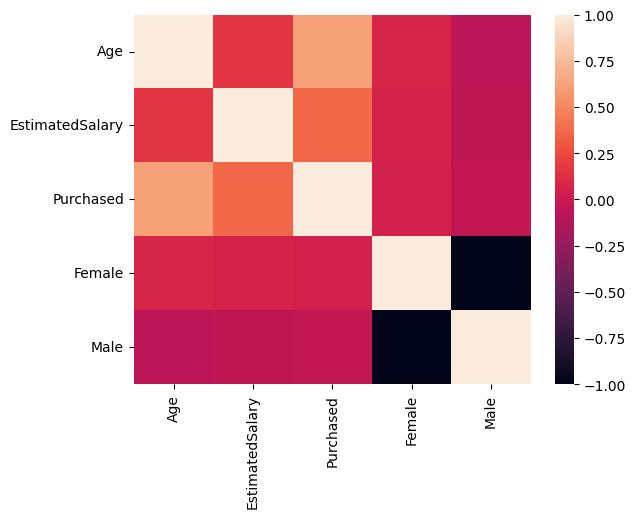

In [181]:
sns.heatmap(df.corr())

In [182]:
df.drop('Male',axis=1,inplace=True)

<Axes: >

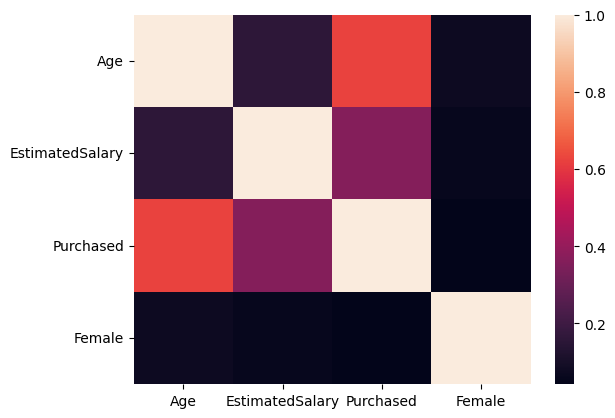

In [183]:
sns.heatmap(df.corr())

In [184]:
df.mean()

,0
Age,37.6550
EstimatedSalary,69742.5000
Purchased,0.3575
Female,0.5100


In [185]:
from sklearn.preprocessing import StandardScaler as Scaler

In [186]:
SS=Scaler()
data=SS.fit_transform(df.drop(['Purchased'], axis=1,inplace=False))

In [187]:
X=pd.DataFrame(data,columns=df.columns[:-1])
X

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,-1.020204
1,-0.253587,-1.460681,-1.020204
2,-1.113206,-0.785290,0.980196
3,-1.017692,-0.374182,0.980196
4,-1.781797,0.183751,-1.020204
...,...,...,...
395,0.797057,-0.844019,0.980196
396,1.274623,-1.372587,-1.020204
397,1.179110,-1.460681,0.980196
398,-0.158074,-1.078938,-1.020204


In [188]:
y=df['Purchased']

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [190]:
from sklearn.svm import SVC

In [191]:
obj=SVC()

In [192]:
obj.fit(X_train, y_train)

SVC()

In [193]:
predict=obj.predict(X_test)

In [194]:
predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [195]:
from sklearn.metrics import confusion_matrix

In [196]:
confusion_matrix(y_test,predict)

array([[48,  4],
       [ 2, 26]])